# 데이터분포 시각화 -3

In [11]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
from pandas import pivot_table

In [4]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [5]:
origin = load_data('flights')
origin.head()

[data] https://data.hossam.kr/data/lab06/flights.xlsx
[desc] 어느 항공사의 년/월별 국제선 탑승객 수(출처: seaborn 내장 데이터)

field       description
----------  ----------------------------------
year        항공 승객 수가 집계된 연도
month       항공 승객 수가 집계된 월
passengers  해당 년도/월의 국제선 항공 승객 수



,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [13]:
# 데이터 전처리
df = origin.copy()
df['month'] = df['month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April':4, 'May':5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'Ouctober': 10, 'November': 11, 'December': 12
})
df.head()

,year,month,passengers
0,1949,1.0,112
1,1949,2.0,118
2,1949,3.0,132
3,1949,4.0,129
4,1949,5.0,121


In [14]:
df2 = pivot_table(df, index = 'year', columns = 'month', values = 'passengers')
df2

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0,12.0
year,,,,,,,,,,,
1949,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,104.0,118.0
1950,115.0,126.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0,114.0,140.0
1951,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,146.0,166.0
1952,171.0,180.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0,172.0,194.0
1953,196.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,180.0,201.0
1954,204.0,188.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0,203.0,229.0
1955,242.0,233.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0,237.0,278.0
1956,284.0,277.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0,271.0,306.0
1957,315.0,301.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0,305.0,336.0


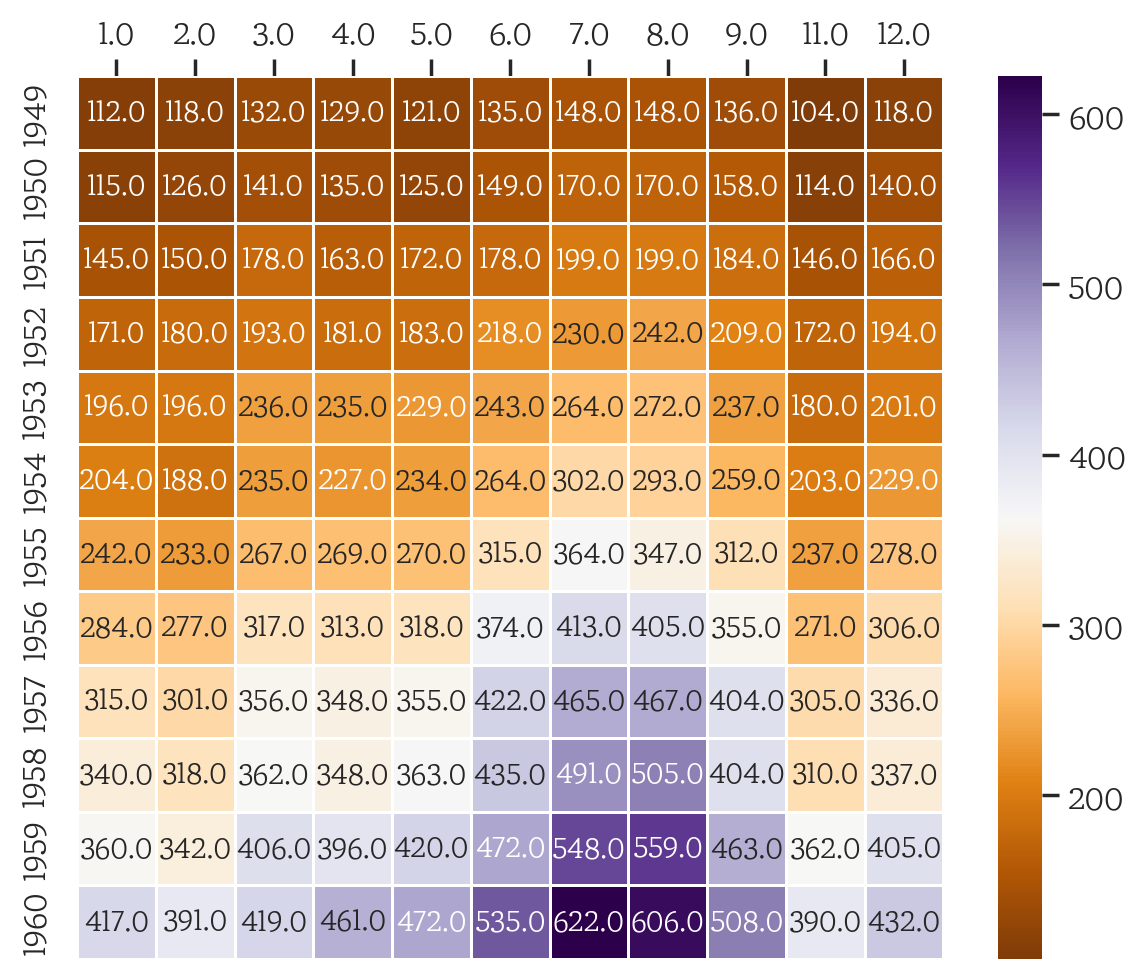

In [22]:
width_px = 1200
height_px = 1000
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# histogram 그리기
sb.heatmap(data = df2, annot = True, fmt='0.1f', linewidth = 0.5, cmap = 'PuOr' 
            )


# 꾸미기
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.tick_top()
# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()